In [32]:
%pip install matplotlib
%pip install tqdm
%pip install pandas

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import numpy as np
import pandas as pd
import os

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [90]:
#Extract the data from the pickle file
features_data = pd.read_pickle("features.pkl")
features_data = features_data.drop(columns=['random_feature'])

#Split data into
#TO ADD

#Redo numbering of subjects
features_data.loc[features_data['subject'] == 16, 'subject'] = 1
features_data.loc[features_data['subject'] == 17, 'subject'] = 12


#######################################################################

#Remove the subject and label collums and normalize
features_data_turncated = features_data.drop(columns=['label', 'subject'])
scaler = preprocessing.StandardScaler()
features_data_scaled = pd.DataFrame(scaler.fit_transform(features_data_turncated))
features_data_scaled = features_data_scaled.join(features_data['label'])
features_data_scaled = features_data_scaled.join(features_data['subject'])

# Create shuffeled subject array
subject_array = np.arange(1, 16)
np.random.shuffle(subject_array)
print(subject_array)

# We choose the firtst 4 subjects in the subject array as test and the rest as train
test_data = pd.DataFrame(features_data_scaled.loc[features_data_scaled['subject'] == subject_array[0]])
train_data = pd.DataFrame(features_data_scaled.loc[features_data_scaled['subject'] == subject_array[4]])
for ts_sub in range(1, 4):
    test_data = pd.concat((test_data, features_data_scaled.loc[features_data_scaled['subject'] == subject_array[ts_sub]]))
for tr_sub in range(4, 15):
    train_data = pd.concat((train_data, features_data_scaled.loc[features_data_scaled['subject'] == subject_array[tr_sub]]))

X_train = train_data.drop(columns=['label', 'subject']).to_numpy()
Y_train = train_data['label'].to_numpy()
x_test = test_data.drop(columns=['label', 'subject']).to_numpy()
y_test = test_data['label'].to_numpy()

#Split the data into a train and test set
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)
print(x_test.shape, y_test.shape)

[ 3  8  2  5 13 11 14  6 12  9 15  4  7  1 10]
(192, 24) (192,)


In [9]:
# pca = PCA(n_components=10)
# pca_features = pd.DataFrame(pca.fit_transform(features_data_turncated))
# #pca_features.join(features_data['subject'])

# # pca_features = features_data_turncated
# print(pca_features)

               0          1          2         3         4         5  \
0    -270.743249  20.795676   0.835935 -3.002686 -1.328443  1.946761   
1    -646.614551 -11.589219   0.357396 -2.384207 -2.429503  0.675609   
2      50.386055  -9.519666 -10.143543 -3.798764 -2.550811  3.615160   
3      42.453306 -25.877603 -14.120875 -3.977298 -3.016076 -1.212256   
4      33.357327  -3.073802   0.063034 -2.262763 -4.807183 -1.695038   
..           ...        ...        ...       ...       ...       ...   
723   916.072406  67.692401  13.099928 -1.315886  2.811891  1.380268   
724   717.005374  83.553448  12.978727 -3.785372  1.471620  0.053791   
725  -427.040735  92.097422  20.793229 -2.648386  0.345992 -0.713010   
726 -1920.883108  49.783855  20.736229 -5.576318 -1.469916 -0.081438   
727 -1338.966942  72.156592  18.558294 -3.211390 -0.164884  1.707603   

            6         7         8         9  
0   -0.492701 -0.053924 -0.435217  0.093159  
1   -0.017713 -0.359456 -0.392887  0.175052

Below the train data is fitted using the following classifiers: Random Forest Classifier, Random Forest Regressor, Decision Tree Regressor, Support Vector Machine, Neural Support Vector Machine, Linear Regression, Bernoulli

In [91]:
#Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import NuSVC,SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB

from sklearn.datasets import make_classification

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix

#Fit data using classifiers and calculate accuracy
#Random Forest Classifier
classifier_RFC = RandomForestClassifier()
classifier_RFC.fit(X_train, Y_train)
y_pred_RFC = classifier_RFC.predict(x_test)
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
mse_RFC = mean_squared_error(y_test, y_pred_RFC)

#Decision Tree Regressor
classifier_DTC = DecisionTreeClassifier(max_depth=3)
classifier_DTC.fit(X_train, Y_train)
y_pred_DTC = classifier_DTC.predict(x_test)
accuracy_DTC = accuracy_score(y_test, y_pred_DTC)
mse_DTC = mean_squared_error(y_test, y_pred_DTC)

#Support Vector Machine
classifier_SVM = SVC(kernel='rbf')
classifier_SVM.fit(X_train, Y_train)
y_pred_SVM = classifier_SVM.predict(x_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
mse_SVM = mean_squared_error(y_test, y_pred_SVM)

#Neural Support Vector Machine
#classifier_NSVM = NuSVC(kernel='linear')
#classifier_NSVM.fit(X_train, Y_train)
#y_pred_NSVM = classifier_NSVM.predict(x_test)
#accuracy_NSVM = accuracy_score(y_test, y_pred_NSVM)
#mse_NSVM = mean_squared_error(y_test, y_pred_NSVM)

#Linear Discriminant Analysis
classifier_LDA = LinearDiscriminantAnalysis()
classifier_LDA.fit(X_train, Y_train)
y_pred_LDA = classifier_LDA.predict(x_test)
accuracy_LDA = accuracy_score(y_test, y_pred_LDA)
mse_LDA = mean_squared_error(y_test, y_pred_LDA)

#Bernoulli
classifier_BNB = BernoulliNB()
classifier_BNB.fit(X_train, Y_train)
y_pred_BNB = classifier_BNB.predict(x_test)
accuracy_BNB = accuracy_score(y_test, y_pred_BNB)
mse_BNB = mean_squared_error(y_test, y_pred_BNB)

print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Random Forrest Classifier', accuracy_RFC*100, mse_RFC))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Decision Tree Regressor', accuracy_DTC*100, mse_DTC))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Support Vector Machine', accuracy_SVM*100, mse_SVM))
#print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Neural Support Vector Machine', accuracy_NSVM*100, mse_NSVM))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Linear Discriminant Analysis', accuracy_LDA*100, mse_LDA))
print("{} Accuracy, MSE: {:.2f}%, {:.2f}".format('Bernoulli', accuracy_BNB*100, mse_BNB))

Random Forrest Classifier Accuracy, MSE: 57.81%, 0.99
Decision Tree Regressor Accuracy, MSE: 73.96%, 0.86
Support Vector Machine Accuracy, MSE: 67.19%, 1.12
Linear Discriminant Analysis Accuracy, MSE: 65.10%, 1.21
Bernoulli Accuracy, MSE: 61.46%, 1.62


Feature ranking:
1. Feature 19 (0.0975216353989966)
2. Feature 10 (0.07629644938695838)
3. Feature 13 (0.07227406356258775)
4. Feature 18 (0.06817678452554844)
5. Feature 5 (0.06433063573582316)
6. Feature 12 (0.06350476021471065)
7. Feature 14 (0.06079254593911059)
8. Feature 22 (0.05874559742142203)
9. Feature 15 (0.05660913554092143)
10. Feature 23 (0.04708507103914269)
11. Feature 4 (0.04017075474712809)
12. Feature 0 (0.03182142760881913)
13. Feature 8 (0.029870685959194263)
14. Feature 9 (0.027874417336610606)
15. Feature 6 (0.027003738577501536)
16. Feature 2 (0.02609323667177559)
17. Feature 17 (0.024895602421402707)
18. Feature 21 (0.02416247737241211)
19. Feature 1 (0.02382998589090753)
20. Feature 11 (0.02231418310153602)
21. Feature 7 (0.01735359852635181)
22. Feature 3 (0.015928352507899493)
23. Feature 16 (0.013217194201395676)
24. Feature 20 (0.01012766631184376)


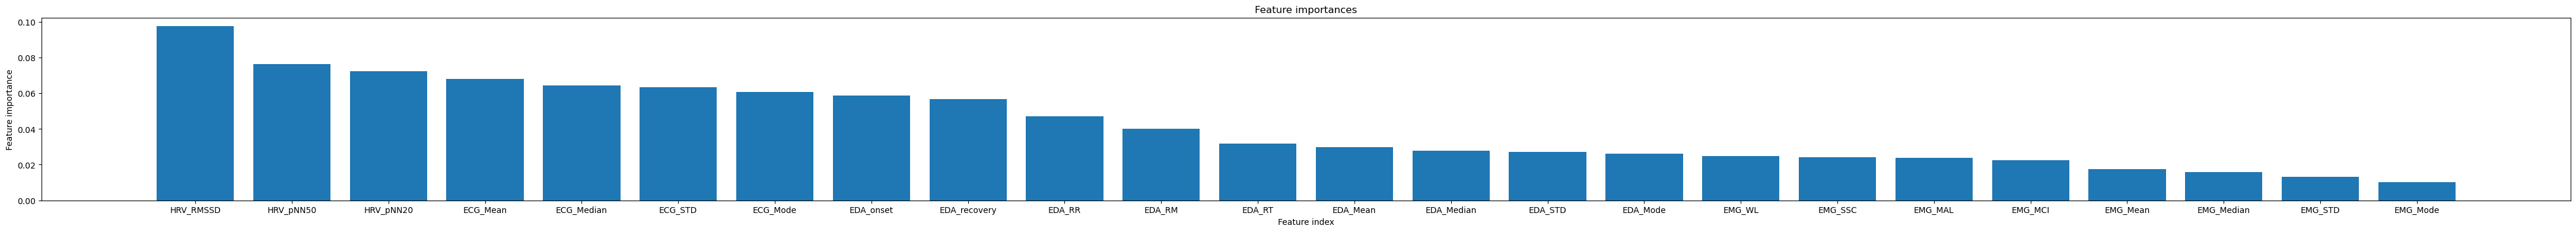

In [92]:
# Get feature importances
importances = classifier_RFC.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.rcParams['figure.figsize'] = [55, 4]
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), list(features_data_turncated.columns))
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.show()

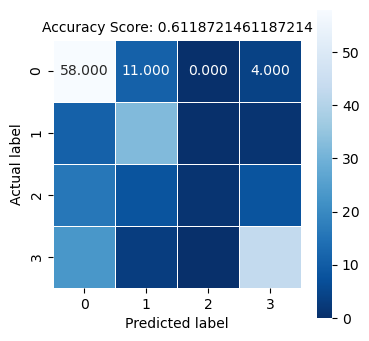

In [256]:
cm = confusion_matrix(y_test, y_pred_RFC)
score = classifier_RFC.score(x_test, y_test)

import seaborn as sns

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);